# Case Study - Netflix Data Exploration & Visualization
## Business problem
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as  sns

## Importing the Data

In [96]:
data = pd.read_csv('movies_data.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [97]:
# Creating a copy to avoid changes in the original dataframe
df = data.copy()

## Data Preparation

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [99]:
# Checking percentage of null values in the data
df.isnull().sum()*100/len(df)

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [100]:
# Taking care of null values
# Director column
# Total TV shows
print(f"Total TV shows: {df['type'].value_counts()[1]}\n")

# TV shows with null director value
df_isnull = df[df['director'].isnull()]
print(f"Null values for TV show director: {df_isnull['type'].value_counts()[0]}\n")


# Percentage of missing directer values for tv shows
total_tv_shows = df['type'].value_counts()[1]
missing_directors  = df_isnull['type'].value_counts()[0]

director_null_perct = missing_directors/total_tv_shows
print(f"Percentage null values for TV show directors : {director_null_perct*100}")

Total TV shows: 2676

Null values for TV show director: 2446

Percentage null values for TV show directors : 91.4050822122571


- As 91% of the directors for TV shows are missing, we can't drop these records or inpute them with some other value as this will manipulate the data
- As percentage of null values for other columns is less than 10 percent we will impute them with mean and mode for numerical and categorical columns respectively

In [101]:
# Data imputation for null values
df['country'].fillna(df['country'].mode().item(), inplace = True)
df['date_added'].fillna(df['date_added'].mode().item(), inplace = True)
df['duration'].fillna(df['duration'].mode().item(), inplace = True)
df['rating'].fillna(df['rating'].mode().item(), inplace = True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [103]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [104]:
# Data transformation into right format
df.rating.value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
66 min         1
84 min         1
Name: rating, dtype: int64

In [105]:
df.loc[df['rating'].isin(['84 min','66 min', '74 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,1 Season,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,1 Season,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,1 Season,Movies,The comic puts his trademark hilarious/thought...


In [106]:
# Transfer duration values from rating column to duration column 
df.loc[df['rating'].isin(['84 min','66 min', '74 min']), 'duration'] = df.loc[df['rating'].isin(['84 min','66 min', '74 min'])]['rating']

# Replace the needless values from rating column with mode
df.loc[df['rating'].isin(['84 min','66 min', '74 min']), 'rating'] = df['rating'].mode().item()

In [107]:
# # Taking care of nested strings 
# cast = df['cast'].apply(lambda x: str(x).split(',')).tolist()
# df_cast = pd.DataFrame(cast,index = df['title'])

# # Converting the data into a dataframe
# df_cast = pd.DataFrame(df_cast.stack().reset_index())
# df_cast.drop('level_1', axis = 1, inplace = True)
# df_cast.columns = ['title','cast']
# df_cast

In [108]:
# Creating new dataframe to join unnested columns
df1 = df[['show_id','type','title','date_added', 'release_year','rating','description','duration']]
df1.head()

,show_id,type,title,date_added,release_year,rating,description,duration
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,"As her father nears the end of his life, filmm...",90 min
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,To protect his family from a powerful drug lor...,1 Season
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",1 Season
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,In a city of coaching centers known to train I...,2 Seasons


In [109]:
# Function to unnest columns
def unnest_data(col_list, original_df, trimmed_df):
#     new_df = trimmed_df.copy()
    for col in col_list:
        split_col = df[col].apply(lambda x: str(x).split(',')).tolist()
        df_col = pd.DataFrame(split_col,index = original_df['title'])

        # Converting the data into a dataframe
        df_col = pd.DataFrame(df_col.stack().reset_index())
        df_col.drop('level_1', axis = 1, inplace = True)
        df_col.columns = ['title',col]
            
        trimmed_df = trimmed_df.merge(df_col, how = 'left', on = 'title')
        
    return trimmed_df

In [110]:
cols_to_unnest = ['director','cast','country', 'listed_in']
df_cleaned = unnest_data(cols_to_unnest, df, df1)

In [111]:
df_cleaned.head()

,show_id,type,title,date_added,release_year,rating,description,duration,director,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,"As her father nears the end of his life, filmm...",90 min,Kirsten Johnson,nan,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows


In [112]:
# Checking for duplicates
dups = df_cleaned[df_cleaned.duplicated()]
len(dups)

7

In [113]:
# Dropping Duplicates keeping the first record
df_cleaned.drop_duplicates(keep = 'first', inplace = True)

In [114]:
# Confirm if duplicates are dropped or not
len(df_cleaned[df_cleaned.duplicated()])

0

In [115]:
df_cleaned.head()

,show_id,type,title,date_added,release_year,rating,description,duration,director,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,"As her father nears the end of his life, filmm...",90 min,Kirsten Johnson,nan,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows


In [116]:
df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'])
df_cleaned.head()

,show_id,type,title,date_added,release_year,rating,description,duration,director,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90 min,Kirsten Johnson,nan,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows


In [117]:
# Adding new features
df_cleaned['release_month'] = df_cleaned['date_added'].dt.month
df_cleaned['release_weekday'] = df_cleaned['date_added'].dt.day_name()
df_cleaned.head()

,show_id,type,title,date_added,release_year,rating,description,duration,director,cast,country,listed_in,release_month,release_weekday
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90 min,Kirsten Johnson,nan,United States,Documentaries,9,Saturday
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,International TV Shows,9,Friday
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Dramas,9,Friday
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries,9,Friday
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows,9,Friday


In [118]:
# Split duration column to get the numerical data to work with
df_cleaned[['time_duration','time_text']] = df_cleaned['duration'].str.split(expand = True)
df_cleaned.drop('time_text', axis = 1, inplace = True)

In [119]:
df_cleaned.head()

,show_id,type,title,date_added,release_year,rating,description,duration,director,cast,country,listed_in,release_month,release_weekday,time_duration
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90 min,Kirsten Johnson,nan,United States,Documentaries,9,Saturday,90
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,International TV Shows,9,Friday,2
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Dramas,9,Friday,2
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries,9,Friday,2
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows,9,Friday,2


In [203]:
# Remove white spaces from start & end of "listed_in" , country columns
df_cleaned['listed_in'] = df_cleaned['listed_in'].str.strip()
df_cleaned['country'] = df_cleaned['country'].str.strip()

In [122]:
df_cleaned.head()

,show_id,type,title,date_added,release_year,rating,description,duration,director,cast,country,listed_in,release_month,release_weekday,time_duration
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90 min,Kirsten Johnson,nan,United States,Documentaries,9,Saturday,90
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,International TV Shows,9,Friday,2
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Dramas,9,Friday,2
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries,9,Friday,2
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows,9,Friday,2


# Data Exploration & Visualization

## Time Based

### How the number of shows has changed over the past few decades

In [123]:
df_cleaned.head()

,show_id,type,title,date_added,release_year,rating,description,duration,director,cast,country,listed_in,release_month,release_weekday,time_duration
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90 min,Kirsten Johnson,nan,United States,Documentaries,9,Saturday,90
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,International TV Shows,9,Friday,2
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Dramas,9,Friday,2
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries,9,Friday,2
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows,9,Friday,2


In [124]:
df_last_30 = df_cleaned[df_cleaned['release_year'] > 1990]

In [125]:
df_last_30['Decade'] = np.nan
df_last_30.loc[(df_last_30['release_year'] >= 1991) & (df_last_30['release_year'] <= 2000), 'Decade'] = '1991-2000'
df_last_30.loc[(df_last_30['release_year'] >= 2001) & (df_last_30['release_year'] <= 2010), 'Decade'] = '2001-2010'
df_last_30.loc[(df_last_30['release_year'] >= 2011) & (df_last_30['release_year'] <= 2020), 'Decade'] = '2011-2020'
df_last_30.loc[df_last_30['release_year'] >= 2021, 'Decade'] = '2021-2030'
df_last_30.head()

C:\Users\ranje\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ranje\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,show_id,type,title,date_added,release_year,rating,description,duration,director,cast,country,listed_in,release_month,release_weekday,time_duration,Decade
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90 min,Kirsten Johnson,nan,United States,Documentaries,9,Saturday,90,2011-2020
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,International TV Shows,9,Friday,2,2021-2030
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Dramas,9,Friday,2,2021-2030
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries,9,Friday,2,2021-2030
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows,9,Friday,2,2021-2030


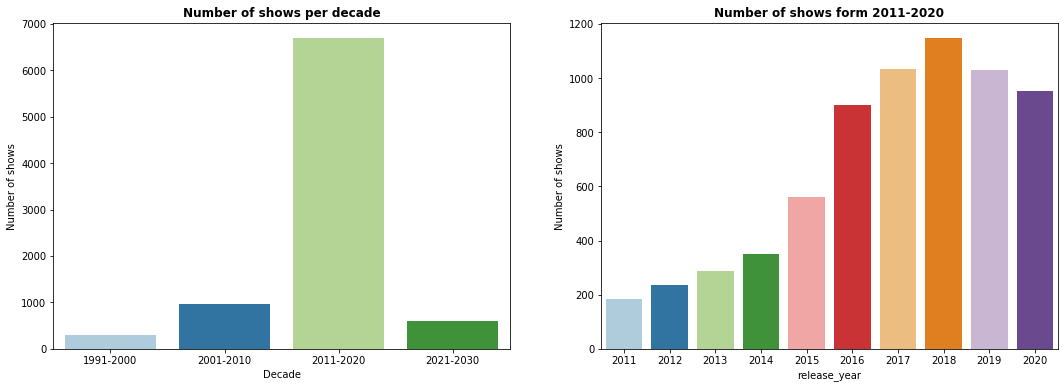

In [167]:
# Plotting the number of unique shows during last 30 years
df_unique_shows = df_last_30.groupby('Decade')['show_id'].nunique().reset_index()

plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.barplot(data = df_unique_shows, x = 'Decade', y = 'show_id')
plt.ylabel('Number of shows')
plt.title('Number of shows per decade', fontweight = 'bold')

# data 
df_2011_20 = df_last_30[df_last_30['Decade'] == '2011-2020']
df_plot = df_2011_20.groupby('release_year')['show_id'].nunique().reset_index()

plt.subplot(1,2,2)
sns.barplot(data = df_plot, x = 'release_year', y = 'show_id')
plt.ylabel('Number of shows')
plt.title('Number of shows form 2011-2020', fontweight = 'bold')
plt.show()

**Assuming the current data is working for the organization**
- The above plots show that the number of shows released has kept on increasing over the decades and the 2011-2020 decade saw and exponential rise in the number of shows released and this seems the way forward. However since 2019 the number of show releases has started reducing and still it's working in favour of Netflix, this shows that quality of content is more important than quantity.
- More number of movies means more content and that seems to have translated into more customers.

**Hence, we should continue to deliver more shows every year to gain more customers.**

 ## Number of shows released per country

In [127]:
df_cleaned.head()

,show_id,type,title,date_added,release_year,rating,description,duration,director,cast,country,listed_in,release_month,release_weekday,time_duration
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90 min,Kirsten Johnson,nan,United States,Documentaries,9,Saturday,90
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,International TV Shows,9,Friday,2
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Dramas,9,Friday,2
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries,9,Friday,2
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows,9,Friday,2


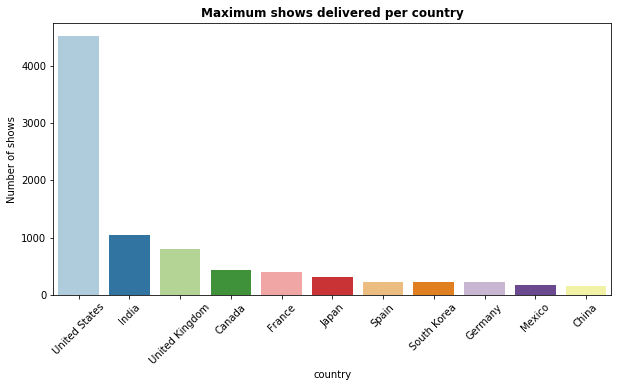

In [204]:
# Data 
df_shows_per_country = df_cleaned.groupby(['country'])['show_id'].nunique().reset_index().sort_values('show_id', ascending = False)
df_shows_per_country.reset_index(drop = True, inplace = True)

# Plot
plt.figure(figsize = (10,5))
sns.barplot(data = df_shows_per_country[:11], x = 'country', y = 'show_id')
plt.ylabel('Number of shows')
plt.xticks(rotation = 45)
plt.title('Maximum shows released per country', fontweight = 'bold')
plt.show()

In [205]:
# Directors from which countries are producing most number of movies
df_director = df_cleaned[df_cleaned['director'] != 'nan']
max_movies_directed = df_director.groupby(['director', 'country'])['show_id'].nunique().reset_index().sort_values('show_id', ascending = False)
max_movies_directed = max_movies_directed[:20]

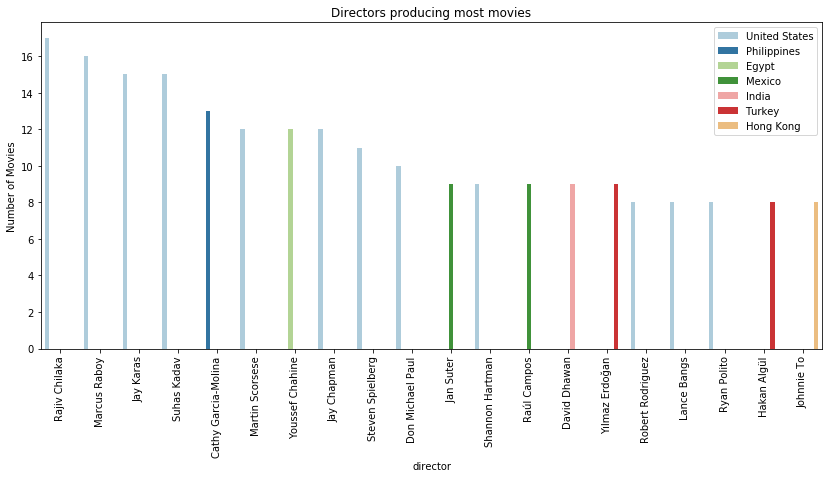

In [207]:
# Plot
plt.figure(figsize = (14,6))
sns.barplot(data = max_movies_directed, x = 'director', y = 'show_id', hue = 'country')
plt.xticks(rotation = 90)
plt.title('Directors producing most movies')
plt.ylabel('Number of Movies')
plt.legend(loc = 'upper right')
plt.show()

**The above plots suggest:**
- Maximum shows are released in USA followed by India & United Kingdom.
- Also majority of the directors directing most movies have majorly worked on producing shows for US market.

**Therefore, to expand in other market (countries), Netflix should encourage experienced directors to direct movies in other markets to expand the customer base.** 

## Best time for show release

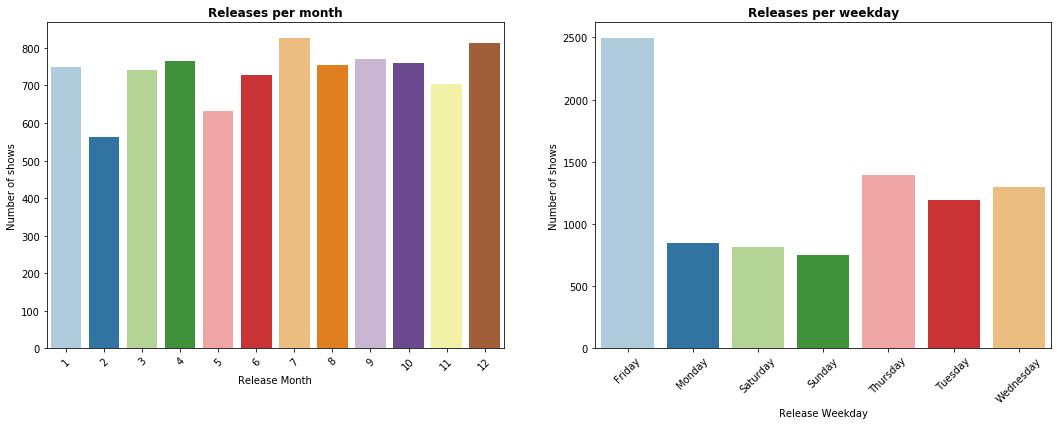

In [129]:
# Data 
shows_per_month = df_cleaned.groupby(['release_month'])['show_id'].nunique().reset_index()

# Plot
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.barplot(data = shows_per_month, x = 'release_month', y = 'show_id')
plt.ylabel('Number of shows')
plt.xlabel('Release Month')
plt.xticks(rotation = 45)
plt.title('Releases per month', fontweight = 'bold')

# Data 
shows_per_weekday = df_cleaned.groupby(['release_weekday'])['show_id'].nunique().reset_index()

# Plot
plt.subplot(1,2,2)
sns.barplot(data = shows_per_weekday, x = 'release_weekday', y = 'show_id')
plt.ylabel('Number of shows')
plt.xlabel('Release Weekday')
plt.xticks(rotation = 45)
plt.title('Releases per weekday', fontweight = 'bold')
plt.show()

**As suggested by the above plots**
- Less shows are released in the month of Feburary as compared to other months, still not too low to not cosider this month for a release. Also, majority of the movies have been released on Fridays.

**Hence, Any Firday of any month is the best day to release a show.**

# Movies vs TV Shows

In [130]:
df_cleaned.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [131]:
df_movies = df_cleaned[df_cleaned['type'] == 'Movie'].reset_index(drop = True)
df_movies.head()

,show_id,type,title,date_added,release_year,rating,description,duration,director,cast,country,listed_in,release_month,release_weekday,time_duration
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90 min,Kirsten Johnson,nan,United States,Documentaries,9,Saturday,90
1,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,Equestria's divided. But a bright-eyed hero be...,91 min,Robert Cullen,Vanessa Hudgens,United States,Children & Family Movies,9,Friday,91
2,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,Equestria's divided. But a bright-eyed hero be...,91 min,Robert Cullen,Kimiko Glenn,United States,Children & Family Movies,9,Friday,91
3,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,Equestria's divided. But a bright-eyed hero be...,91 min,Robert Cullen,James Marsden,United States,Children & Family Movies,9,Friday,91
4,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,Equestria's divided. But a bright-eyed hero be...,91 min,Robert Cullen,Sofia Carson,United States,Children & Family Movies,9,Friday,91


In [132]:
df_tvshows = df_cleaned[df_cleaned['type'] == 'TV Show'].reset_index(drop = True)
df_tvshows.head()

,show_id,type,title,date_added,release_year,rating,description,duration,director,cast,country,listed_in,release_month,release_weekday,time_duration
0,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,International TV Shows,9,Friday,2
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Dramas,9,Friday,2
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Ama Qamata,South Africa,TV Mysteries,9,Friday,2
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Khosi Ngema,South Africa,International TV Shows,9,Friday,2
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2 Seasons,nan,Khosi Ngema,South Africa,TV Dramas,9,Friday,2


## Ratings to consider while producing Movie or TV shows

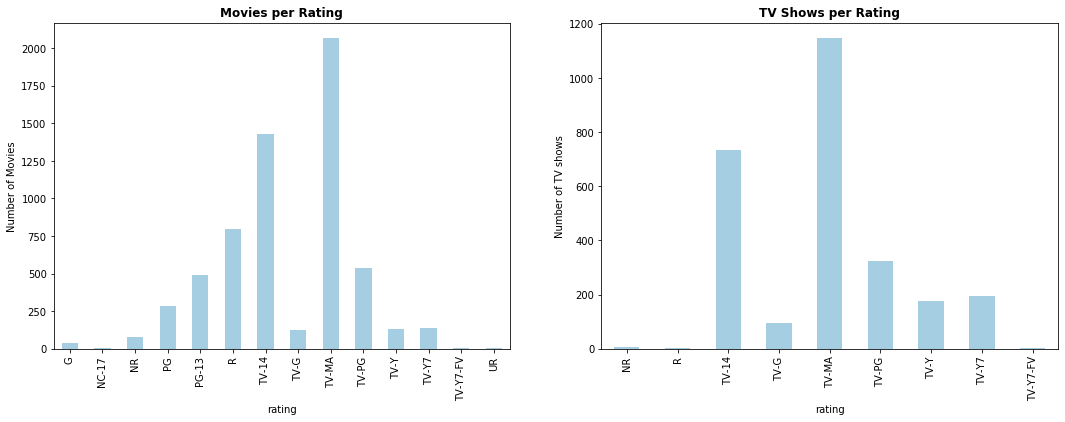

In [133]:
# Data 
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
df_movies.groupby('rating')['show_id'].nunique().plot(kind = 'bar')
plt.title('Movies per Rating', fontweight = 'bold')
plt.ylabel('Number of Movies')

# For TV shows
plt.subplot(1,2,2)
df_tvshows.groupby('rating')['show_id'].nunique().plot(kind = 'bar')
plt.title('TV Shows per Rating', fontweight = 'bold')
plt.ylabel('Number of TV shows')
plt.show()

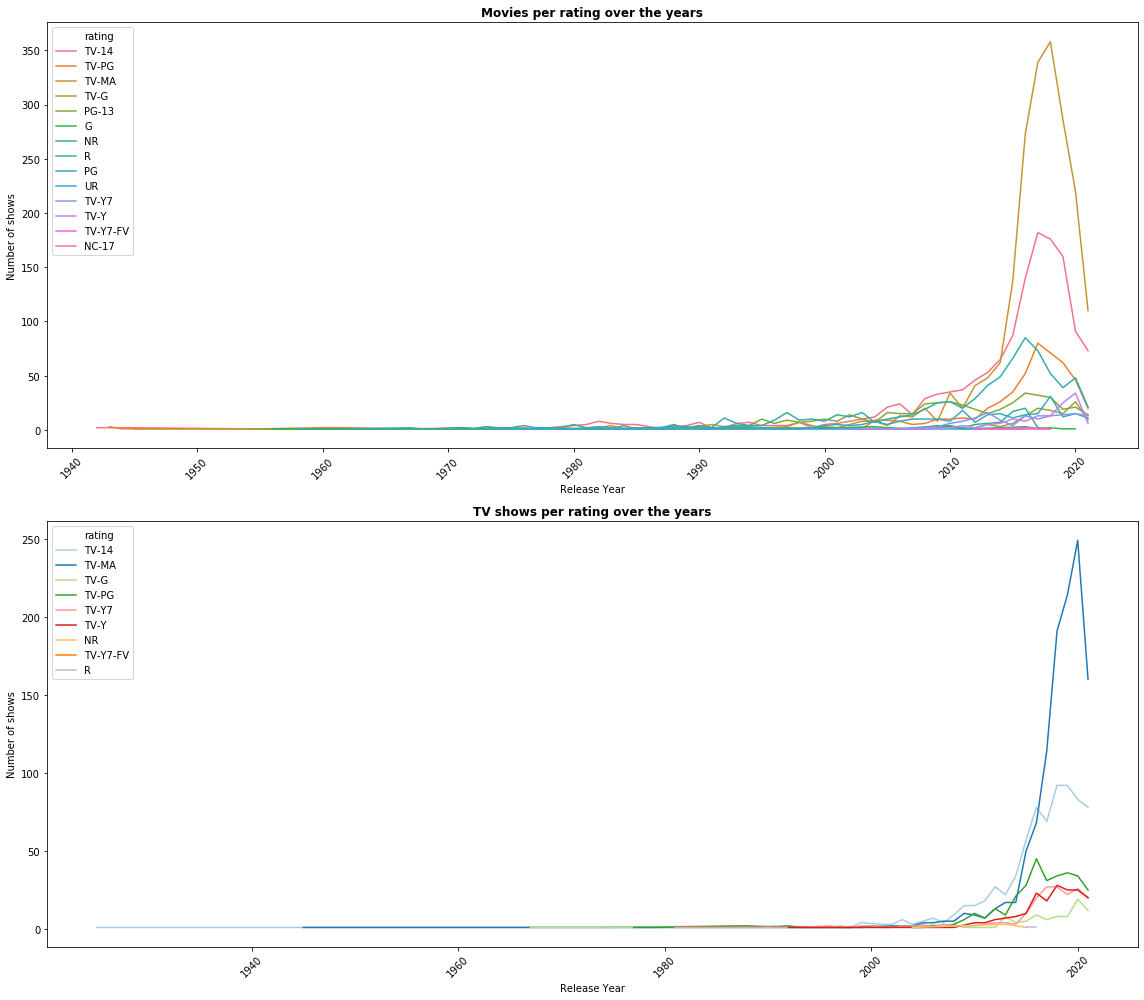

In [134]:
# Data 
df_movies_per_rating = df_movies.groupby(['release_year','rating'])['show_id'].nunique().reset_index()

# Plot
plt.figure(figsize = (16,14))
sns.set_palette("Paired")
plt.subplot(2,1,1)
sns.lineplot(data = df_movies_per_rating, x = 'release_year', y = 'show_id', hue = 'rating')
plt.ylabel('Number of shows')
plt.xlabel('Release Year')
plt.xticks(rotation = 45)
plt.title('Movies per rating over the years', fontweight = 'bold')

# Data 
df_tvshows_per_rating = df_tvshows.groupby(['release_year','rating'])['show_id'].nunique().reset_index()

# Plot
plt.subplot(2,1,2)
sns.lineplot(data = df_tvshows_per_rating, x = 'release_year', y = 'show_id', hue = 'rating')
plt.ylabel('Number of shows')
plt.xlabel('Release Year')
plt.xticks(rotation = 45)
plt.title('TV shows per rating over the years', fontweight = 'bold')
plt.tight_layout()
plt.show()

**The above plots reveal that:**
-  Most of the Movies and TV shows have a rating of TV-MA followed by TV-14. However, the TV-MA rating was not always the preffered rating and this swap shows the changing taste of the audience and is the most significant thing to consider while producing shows. 
- The "Rating over time" graph shows how TV-MA and TV-14 ratings have emerged as the most preffered rating over last two decades.

**Hence, Netflix must give more significance to producing shows (Movies/TV shows) rated as TV-MA and TV-14 followed by others as they have worked very well in the past.**

## Genres to consider while producing Movie or TV shows
We will only consider the data for last three decades for this analysis to cater to the taste of most recent audience

In [135]:
# Limiting the data to last 3 decades to cater to the taste of most recent audience
last_3_decades_movies = df_movies[df_movies['release_year'] >= 1991]
last_3_decades_tvshows = df_tvshows[df_tvshows['release_year'] >= 1991]

In [136]:
# Finding out top 10 most used movie genres
top_movie_genres = last_3_decades_movies.groupby('listed_in')['show_id'].nunique().reset_index().sort_values('show_id', ascending = False)
top_movie_genres = top_movie_genres['listed_in'][:10].tolist()

# Limiting the data to top 10 genres
df_top_movie_genres = last_3_decades_movies[last_3_decades_movies['listed_in'].isin(top_movie_genres)].reset_index(drop = True)

# Plot data
df_top_movie_genres = df_top_movie_genres.groupby(['release_year','listed_in'])['show_id'].nunique().reset_index()

In [137]:
# Finding out top 10 most used TV-show genres
top_tv_genres = last_3_decades_tvshows.groupby('listed_in')['show_id'].nunique().reset_index().sort_values('show_id', ascending = False)
top_tv_genres = top_tv_genres['listed_in'][:10].tolist()

# Limiting the data to top 10 genres
df_top_tv_genres = last_3_decades_tvshows[last_3_decades_tvshows['listed_in'].isin(top_tv_genres)].reset_index(drop = True)

# Plot data
df_top_tv_genres = df_top_tv_genres.groupby(['release_year','listed_in'])['show_id'].nunique().reset_index()


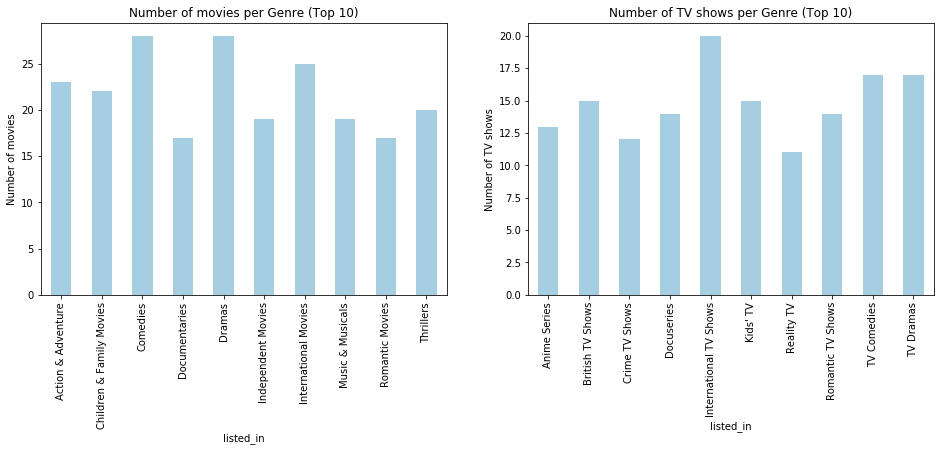

In [138]:
# Count of Movies & TV shows per Genre
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
df_top_movie_genres.groupby('listed_in')['show_id'].nunique().plot(kind = 'bar')
plt.ylabel('Number of movies')
plt.title('Number of movies per Genre (Top 10)')

plt.subplot(1,2,2)
df_top_tv_genres.groupby('listed_in')['show_id'].nunique().plot(kind = 'bar')
plt.ylabel('Number of TV shows')
plt.title('Number of TV shows per Genre (Top 10)')
plt.show()

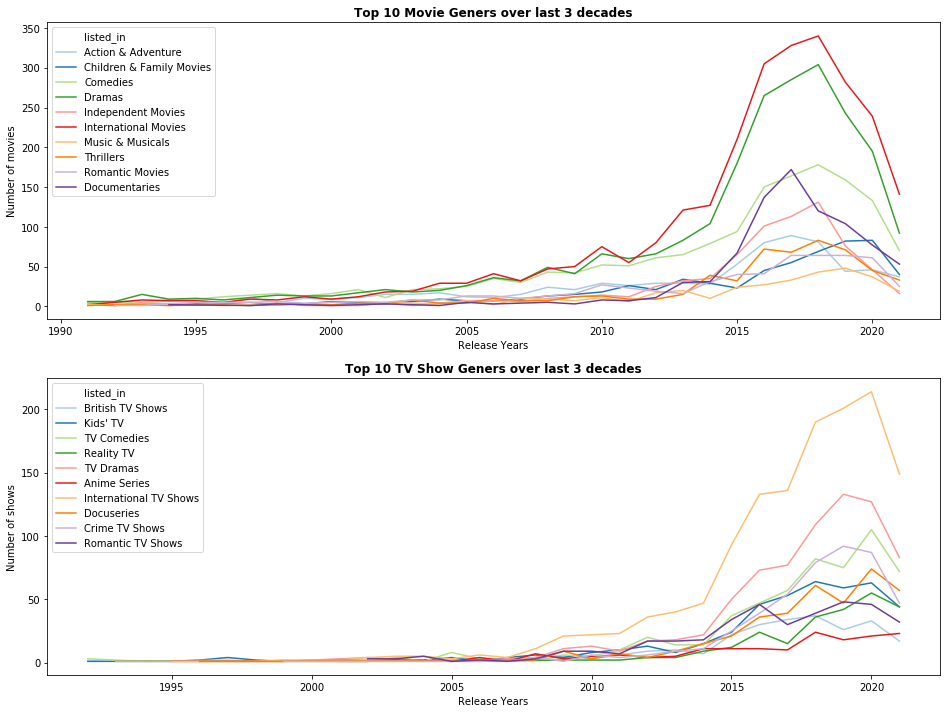

In [139]:
# Analysis with respect to time
plt.figure(figsize = (16,12))
plt.tight_layout()

# Movies plot
plt.subplot(2,1,1)
sns.lineplot(data = df_top_movie_genres, x = 'release_year', y = 'show_id', hue = 'listed_in')
plt.title('Top 10 Movie Geners over last 3 decades', fontweight = 'bold')
plt.ylabel('Number of movies')
plt.xlabel('Release Years')

# TV show plot
plt.subplot(2,1,2)
sns.lineplot(data = df_top_tv_genres, x = 'release_year', y = 'show_id', hue = 'listed_in')
plt.title('Top 10 TV Show Geners over last 3 decades', fontweight = 'bold')
plt.ylabel('Number of shows')
plt.xlabel('Release Years')
plt.show()

**The above plots suggest:**
- For Movies:
- (International Movies, Dramas, Comedies) are the most used genres followed by (Action & Adventure and Children & Family)  genres.
- The time based chart shows that International Movies genre is dominating the other categories over the last 2 decades followed by Drama category.

- For TV Shows:
- Similar to movies "International TV shows" is the most used genre followed by (TV Comedies & TV Dramas)
- The time based chart also paints the same picture where, the International TV shows and Drama genres are dominating other categories over last 2 decades.

**Hence more importance must be given to these two genres (International shows and Drama) over other genres while producing both Movies and TV shows**

## Focus on Movies or TV Shows 

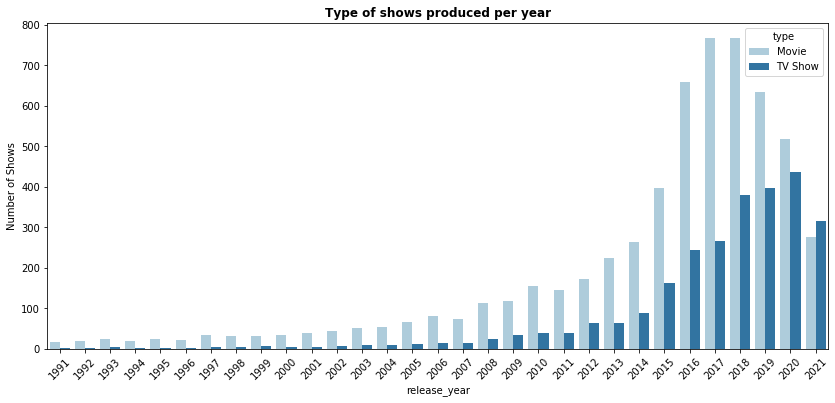

In [172]:
df_focus = df_last_30.groupby(['type','release_year'])['show_id'].nunique().reset_index()
plt.figure(figsize = (14,6))
sns.barplot(data = df_focus, x = 'release_year', y = 'show_id', hue = 'type')
plt.title('Type of shows produced per year', fontweight = 'bold')
plt.ylabel('Number of Shows')
plt.xticks(rotation = 45)
plt.show()

**The above plot shows that Netflix is focusing on producing more TV shows than movies in recent years**

## Ideal duration of shows 

In [154]:
# Changing datatype
df_movies['time_duration'] = df_movies['time_duration'].astype('int')
df_tvshows['time_duration'] = df_tvshows['time_duration'].astype('int')

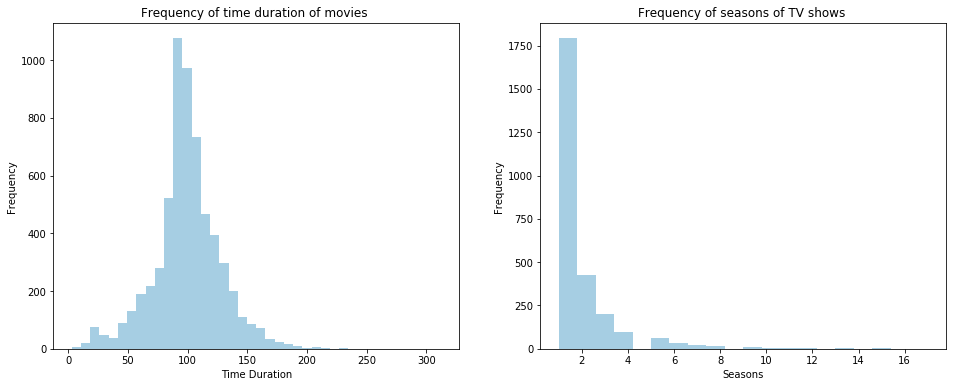

In [164]:
# Plot Frequency
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
df_movies.groupby('show_id')['time_duration'].mean().plot(kind = 'hist', bins = 40)
plt.xlabel('Time Duration')
plt.title('Frequency of time duration of movies ')


plt.subplot(1,2,2)
df_tvshows.groupby('show_id')['time_duration'].mean().plot(kind = 'hist', bins = 20)
plt.xlabel('Seasons')
plt.title('Frequency of seasons of TV shows ')
plt.show()

Form the above plots, we can understand that:
- For majority of the movies the time duration lies between 90 min to 110 mins.
- And majority of the TV shows have only one season.

**Netflix should consider producing movies which will last around 90-110 mins, also for TV shows they sould focus on creating shows which will last for more that one season, to keep the audiences hooked to the platform.**
    

# Observations

**Assuming the current data is working for the Netflix**

Time Based:
- The number of shows released has increased consistently over the decades and the 2011-2020 decade saw and exponential rise in the number of shows released and this seems the way forward.
- However since 2019 the number of show releases has started reducing and still it's working in favour of Netflix, this shows that quality of content is more important than quantity.

Country & Directors:
- Maximum shows are released in USA followed by India & United Kingdom.
- Also majority of the directors directing most movies have majorly worked on producing shows for US market.

Best time for releases:
- Less shows are released in the month of Feburary as compared to other months, still not too low to not cosider this month for a release. Also, majority of the movies have been released on Fridays.

Rating Based:
- Most of the Movies and TV shows have a rating of TV-MA followed by TV-14. However, the TV-MA rating was not always the preffered rating and this swap shows the changing taste of the audience and is the most significant thing to consider while producing shows. 
- The "Rating over time" graph shows how TV-MA and TV-14 ratings have emerged as the most preffered rating over last two decades.

Genre Based:
- For Movies:
- (International Movies, Dramas, Comedies) are the most used genres followed by (Action & Adventure and Children & Family)  genres.
- The time based chart shows that International Movies genre is dominating the other categories over the last 2 decades followed by Drama category.

- For TV Shows:
- Similar to movies "International TV shows" is the most used genre followed by (TV Comedies & TV Dramas)
- The time based chart also paints the same picture where, the International TV shows and Drama genres are dominating other categories over last 2 decades.



# Recommendations:

1. Netflix should continue to deliver more shows every year to gain more customers but also focus on the quality of the shows.
1. In order to expand in multiple markets(countries), Netflix should encourage experienced directors to direct movies in other markets to expand the customer base.
2. Any Friday of any month is the best day to release a show.
3. Netflix must give more significance to producing shows(Movies/TV shows) that are rated TV-MA and TV-14 followed by others as they have worked very well in the past.
4. Also more importance must be given to genres like International shows and Drama over other genres while producing both Movies and TV shows.